In [1]:
import skimage.io
import cv2
from matplotlib import pyplot as plt
import numpy as np
import skimage.filters

with conversion to 8 bit

(2054, 2456, 3)
(2054, 2456)


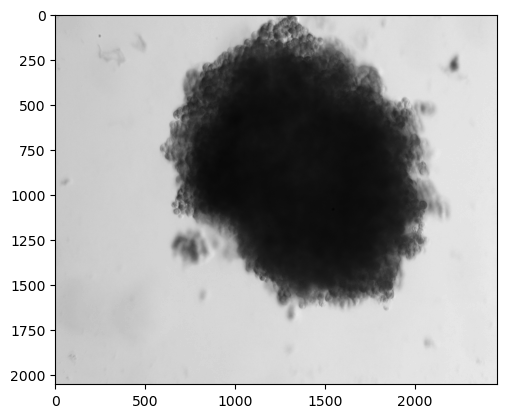

In [2]:
#path = r'C:\Users\k54739\Bibin\thesis\Data_supervised\single_dose\D08-T01.tiff'
path = r'c:\Users\k54739\Today_data\combined_1259\Final_simclr\24.tiff'
image = skimage.io.imread(path)
print(image.shape)

# Convert to gray 
if len(image.shape) == 3: 
    img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
else: 
    img_gray = image

# Convert to 8-bit format
img_gray_8bit = cv2.normalize(img_gray, None, 0, 255, cv2.NORM_MINMAX).astype('uint8')
print(img_gray_8bit.shape)
plt.subplots()
plt.imshow(img_gray_8bit, cmap="gray")



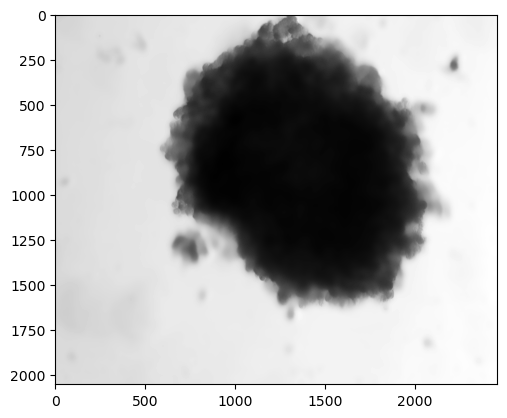

In [3]:
# Blur using bilateral filter
blur = cv2.bilateralFilter(img_gray_8bit, 50, 40, 40)

plt.subplots()
plt.imshow(blur, cmap="gray")
plt.show()


(0.0, 256.0)

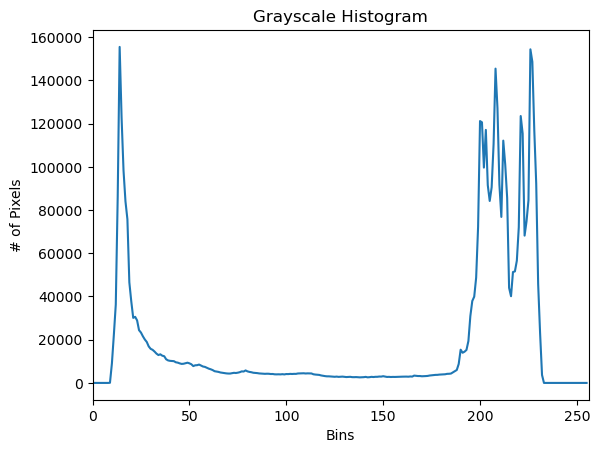

In [4]:
hist = cv2.calcHist([blur], [0], None, [256], [0, 256])
# plot the histogram
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(hist)
plt.xlim([0, 256])
#plt.subplots()

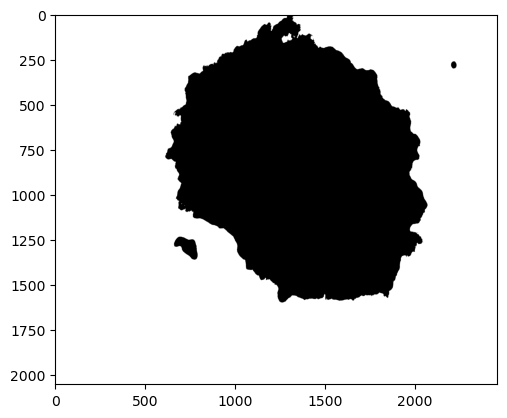

In [5]:
t = skimage.filters.threshold_otsu(blur)
binary_mask = blur > t

plt.subplots()
plt.imshow(binary_mask,cmap="gray")

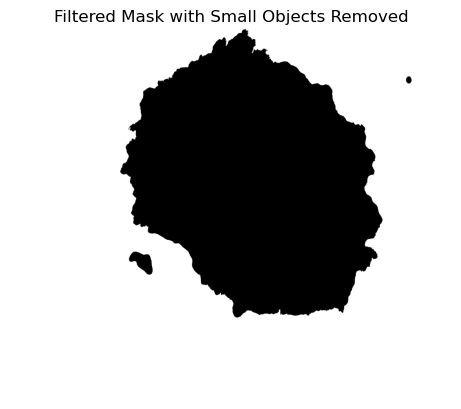

In [13]:
import skimage
from skimage import morphology
import matplotlib.pyplot as plt

# Ensure the mask is of type `bool`
binary_mask = binary_mask.astype(bool)

# Remove small objects
filtered_mask = skimage.morphology.remove_small_objects(binary_mask, min_size=3460000)

# Plot the result
plt.subplots()
plt.imshow(filtered_mask, cmap="gray")
plt.title("Filtered Mask with Small Objects Removed")
plt.axis("off")
plt.show()


In [15]:
from skimage.measure import label

labeled_mask = label(binary_mask)
print(f"Number of connected components: {np.max(labeled_mask)}")


Number of connected components: 31


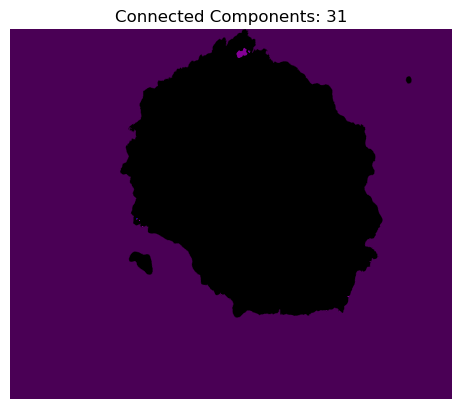

In [16]:
from skimage.measure import label
import matplotlib.pyplot as plt

# Label the connected components
labeled_mask = label(binary_mask)

# Visualize the labeled mask
plt.imshow(labeled_mask, cmap='nipy_spectral')  # Each component gets a unique color
plt.title(f"Connected Components: {np.max(labeled_mask)}")
plt.axis("off")
plt.show()


In [17]:
from skimage.measure import regionprops
regions = regionprops(labeled_mask)
for region in regions:
    print(f"Component {region.label}: Area = {region.area}")


Component 1: Area = 3466682.0
Component 2: Area = 2.0
Component 3: Area = 1758.0
Component 4: Area = 1.0
Component 5: Area = 1.0
Component 6: Area = 1.0
Component 7: Area = 39.0
Component 8: Area = 4.0
Component 9: Area = 1.0
Component 10: Area = 1.0
Component 11: Area = 4.0
Component 12: Area = 1.0
Component 13: Area = 1.0
Component 14: Area = 1.0
Component 15: Area = 1.0
Component 16: Area = 1.0
Component 17: Area = 1.0
Component 18: Area = 1.0
Component 19: Area = 1.0
Component 20: Area = 11.0
Component 21: Area = 5.0
Component 22: Area = 1.0
Component 23: Area = 1.0
Component 24: Area = 1.0
Component 25: Area = 1.0
Component 26: Area = 1.0
Component 27: Area = 1.0
Component 28: Area = 3.0
Component 29: Area = 1.0
Component 30: Area = 1.0
Component 31: Area = 1.0


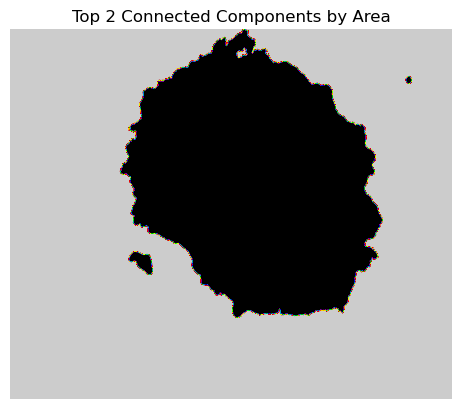

In [23]:
from skimage.measure import label, regionprops
import numpy as np
import matplotlib.pyplot as plt

# Label the connected components
labeled_mask = label(binary_mask)

# Get all regions and sort them by area in descending order
regions = regionprops(labeled_mask)
regions_sorted = sorted(regions, key=lambda x: x.area, reverse=True)

# Keep only the top 2 components
top_components = [region.label for region in regions_sorted[:2]]

# Create a new mask containing only the top 2 components
top_2_mask = np.isin(labeled_mask, top_components)

# Visualize the top 2 connected components
plt.imshow(top_2_mask, cmap='nipy_spectral')
plt.title("Top 2 Connected Components by Area")
plt.axis("off")
plt.show()


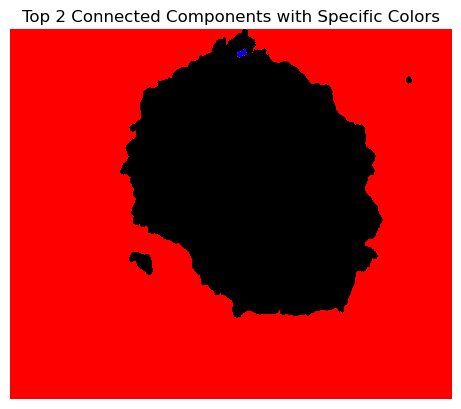

In [31]:
from skimage.measure import label, regionprops
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Label the connected components
labeled_mask = label(binary_mask)

# Get all regions and sort them by area in descending order
regions = regionprops(labeled_mask)
regions_sorted = sorted(regions, key=lambda x: x.area, reverse=True)

# Keep only the top 2 components
top_components = [region.label for region in regions_sorted[:2]]

# Create a new mask containing only the top 2 components
top_2_mask = np.zeros_like(labeled_mask, dtype=np.int32)
for i, label_value in enumerate(top_components):
    top_2_mask[labeled_mask == label_value] = i + 1  # Assign 1 for the largest and 2 for the second largest

# Create a custom colormap (Red for 1, Blue for 2)
custom_cmap = ListedColormap(['black', 'red', 'blue'])  # Black for background, red for the largest, blue for the second largest

# Visualize the top 2 connected components
plt.imshow(top_2_mask, cmap=custom_cmap)
plt.title("Top 2 Connected Components with Specific Colors")
plt.axis("off")
plt.show()


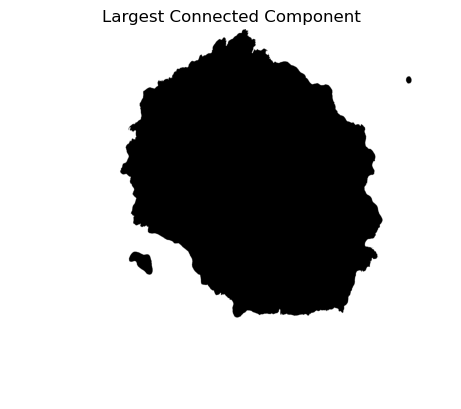

In [24]:
from skimage.measure import label, regionprops
import numpy as np
import matplotlib.pyplot as plt

# Label the connected components
labeled_mask = label(binary_mask)

# Get all regions and sort them by area in descending order
regions = regionprops(labeled_mask)
regions_sorted = sorted(regions, key=lambda x: x.area, reverse=True)

# Keep only the largest component
largest_component_label = regions_sorted[0].label  # Largest component

# Create a new mask containing only the largest component
largest_mask = (labeled_mask == largest_component_label)

# Visualize the largest connected component
plt.imshow(largest_mask, cmap='gray')
plt.title("Largest Connected Component")
plt.axis("off")
plt.show()


In [7]:
import cv2
import numpy as np

# Load the image
image = cv2.imread(r'C:\Users\k54739\Downloads\last.png')
image.shape
# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Threshold the image to create a binary image
_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Find contours in the binary image
contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Draw bounding boxes around the contours
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)

# Display the image with the bounding boxes
cv2.imshow('Bounding Boxes', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:1301: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvShowImage'


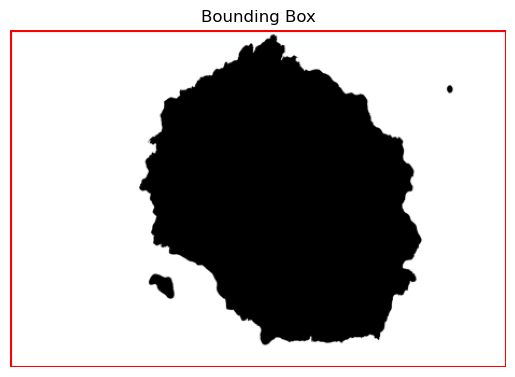

In [9]:
import cv2
import matplotlib.pyplot as plt

# Load and process the image
image = cv2.imread(r'C:\Users\k54739\Downloads\last.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, binary = cv2.threshold(gray, 1, 255, cv2.THRESH_BINARY)
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
largest_contour = max(contours, key=cv2.contourArea)
x, y, w, h = cv2.boundingRect(largest_contour)
cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 2)

# Convert BGR to RGB for matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(image_rgb)
plt.axis("off")
plt.title("Bounding Box")
plt.show()


In [11]:
import cv2
import numpy as np

def find_large_circle_bounding_box(image_path):
    # Read the image
    image = cv2.imread(image_path)
    
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Threshold to get binary image
    _, binary = cv2.threshold(gray, 10, 255, cv2.THRESH_BINARY_INV)
    
    # Find contours
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Sort contours by area in descending order
    contours = sorted(contours, key=cv2.contourArea, reverse=True)
    
    # The first contour (largest) is the large circle
    large_circle = contours[0]
    
    # Get the bounding rectangle
    x, y, w, h = cv2.boundingRect(large_circle)
    
    return x, y, w, h

# Example usage
image_path = r'C:\Users\k54739\Downloads\last.png'
x, y, w, h = find_large_circle_bounding_box(image_path)
print(f"Bounding Box: x={x}, y={y}, width={w}, height={h}")

Bounding Box: x=121, y=5, width=261, height=287


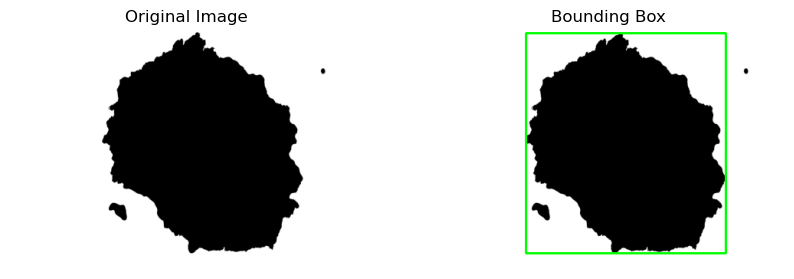

Bounding Box: x=121, y=5, width=261, height=287


In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def find_large_circle_bounding_box(image_path):
    # Read the image
    image = cv2.imread(image_path)
    
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Threshold to get binary image
    _, binary = cv2.threshold(gray, 10, 255, cv2.THRESH_BINARY_INV)
    
    # Find contours
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Sort contours by area in descending order
    contours = sorted(contours, key=cv2.contourArea, reverse=True)
    
    # The first contour (largest) is the large circle
    large_circle = contours[0]
    
    # Get the bounding rectangle
    x, y, w, h = cv2.boundingRect(large_circle)
    
    # Draw bounding box on the original image
    result_image = image.copy()
    cv2.rectangle(result_image, (x, y), (x+w, y+h), (0, 255, 0), 2)
    
    # Use matplotlib to display images
    # Convert BGR to RGB for matplotlib
    result_image_rgb = cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB)
    
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Original Image")
    plt.axis("off")
    
    plt.subplot(1, 2, 2)
    plt.imshow(result_image_rgb)
    plt.title("Bounding Box")
    plt.axis("off")
    
    plt.show()
    
    return x, y, w, h

# Example usage
image_path = r'C:\Users\k54739\Downloads\last.png'
x, y, w, h = find_large_circle_bounding_box(image_path)
print(f"Bounding Box: x={x}, y={y}, width={w}, height={h}")


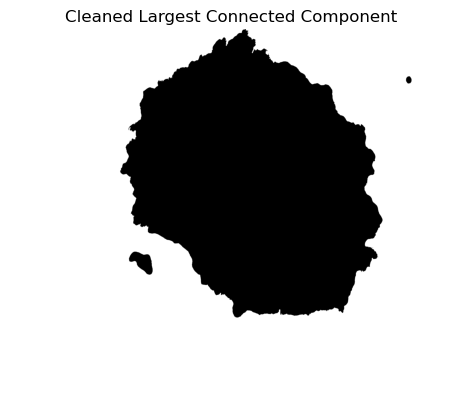

In [29]:
from skimage import morphology
import matplotlib.pyplot as plt
import numpy as np

# Remove small objects from the largest component mask
cleaned_mask = morphology.remove_small_objects(largest_mask.astype(bool), min_size=1000000)

# Visualize the cleaned mask
plt.imshow(cleaned_mask, cmap='gray')
plt.title("Cleaned Largest Connected Component")
plt.axis("off")
plt.show()


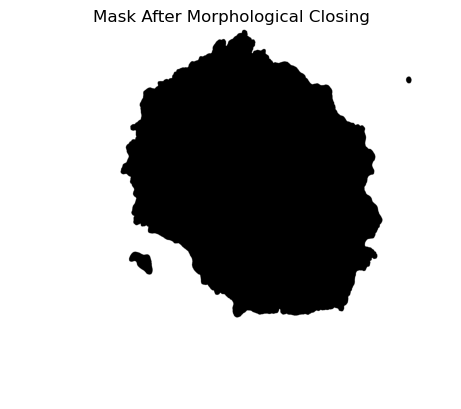

In [30]:
from skimage.morphology import closing, disk

# Apply morphological closing
closed_mask = closing(largest_mask, disk(10))  # Adjust the disk size as needed

# Visualize the result
plt.imshow(closed_mask, cmap='gray')
plt.title("Mask After Morphological Closing")
plt.axis("off")
plt.show()


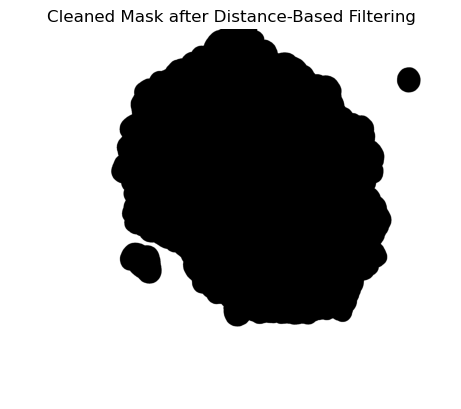

In [28]:
from skimage.measure import label, regionprops
from scipy.ndimage import distance_transform_edt
import matplotlib.pyplot as plt
import numpy as np

# Perform a distance transform
distance = distance_transform_edt(largest_mask)

# Threshold the distance to separate large regions from smaller parts
distance_threshold = 50  # Adjust based on the scale of your image
separated_mask = distance > distance_threshold

# Label the separated regions
labeled_mask = label(separated_mask)

# Keep only the largest region
regions = regionprops(labeled_mask)
largest_region = max(regions, key=lambda r: r.area)
cleaned_mask = labeled_mask == largest_region.label

# Visualize the cleaned mask
plt.imshow(cleaned_mask, cmap='gray')
plt.title("Cleaned Mask after Distance-Based Filtering")
plt.axis("off")
plt.show()


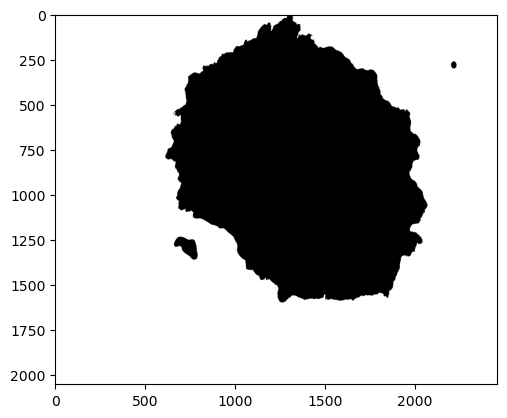

In [7]:
#remove small objects 
filtered_mask = skimage.morphology.remove_small_objects(binary_mask,10000)
plt.subplots()
plt.imshow(filtered_mask,cmap="gray")

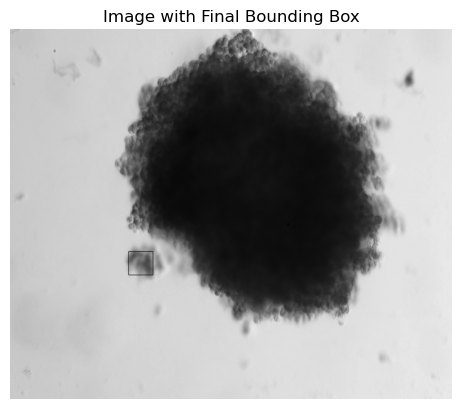

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Convert filtered_mask to uint8
filtered_mask_uint8 = np.asarray(filtered_mask, dtype="uint8")

# Find contours
contours, hierarchy = cv2.findContours(filtered_mask_uint8, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Initialize variables to track the largest and second-largest bounding boxes
largest_area = 0
second_largest_area = 0
largest_bbox = None
second_largest_bbox = None

# Image dimensions
img_height, img_width = img_gray_8bit.shape[:2]

# Iterate over contours
for c in contours:
    rect = cv2.boundingRect(c)
    x, y, w, h = rect
    area = w * h  # Calculate the area of the bounding box
    
    # Check if this is the largest bounding box
    if area > largest_area:
        # Shift the current largest to second-largest
        second_largest_area = largest_area
        second_largest_bbox = largest_bbox

        # Update the largest
        largest_area = area
        largest_bbox = rect
    elif area > second_largest_area:  # Check if this is the second-largest
        second_largest_area = area
        second_largest_bbox = rect

# Determine the final bounding box
if largest_bbox:
    x, y, w, h = largest_bbox
    if w == img_width and h == img_height:  # If largest box covers the whole image
        final_bbox = second_largest_bbox
    else:
        final_bbox = largest_bbox
else:
    final_bbox = None  # No valid bounding box found

# Draw the final bounding box on the image
if final_bbox:
    x, y, w, h = final_bbox
    cv2.rectangle(img_gray_8bit, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Display the image with the final bounding box
plt.subplots()
plt.imshow(img_gray_8bit, cmap="gray")
plt.title("Image with Final Bounding Box")
plt.axis("off")
plt.show()


In [9]:
print(x)
print(y)
print(w)
print(h)

659
1235
135
130


filtered_mask_uint8= np.asarray(filtered_mask, dtype="uint8")
contours, hierarchy = cv2.findContours(filtered_mask_uint8, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
for c in contours:
    rect = cv2.boundingRect(c)
    x,y,w,h = rect
    cv2.rectangle(img_gray_8bit,(x,y),(x+w,y+h),(0,255,0),2)
plt.subplots()
plt.imshow(img_gray_8bit,cmap="gray")


In [9]:
max_value = max(w, h)
size = max_value + 200
new_x = x + (w - size) // 2  # Center the square box
new_y = y + (h - size) // 2  # Center the square box


In [10]:
print(size)
print(new_x)
print(new_y)

1848
326
210


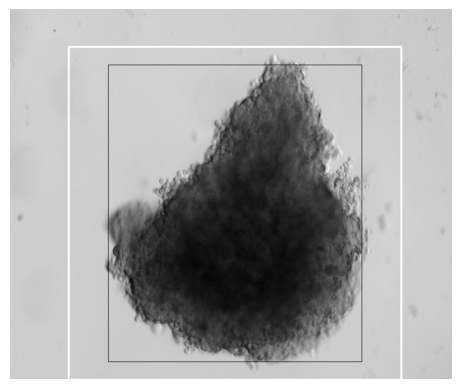

In [11]:
# Draw the rectangle on the image (white color in BGR format)
cv2.rectangle(img_gray_8bit, (new_x, new_y), (new_x + size, new_y + size), (255, 255, 255), thickness=10)

# Convert the image from BGR (OpenCV format) to RGB (Matplotlib format)
image_rgb = cv2.cvtColor(img_gray_8bit, cv2.COLOR_BGR2RGB)

# Display the image with matplotlib
plt.imshow(image_rgb)
plt.axis('off')  # Hide axes
plt.show()


In [12]:
import tifffile as tiff

In [13]:
image_tiff = tiff.imread(path)
pixel_min = np.min(image_tiff)
pixel_max = np.max(image_tiff)

print(f"Range: {pixel_min} - {pixel_max}") 
print(image_tiff.shape)


Range: 9250 - 48619
(3, 2054, 2456)


In [14]:
def count_unique_per_channel(image_tiff):
    unique_counts = []
    for channel in range(image_tiff.shape[0]):  # Loop through each channel (you know it's 3 channels)
        unique_vals = np.unique(image_tiff[channel])
        unique_counts.append(len(unique_vals))
    return unique_counts

# Count unique pixels per channel
unique_per_channel = count_unique_per_channel(image_tiff)

# Print the result
print("Unique pixel counts per channel:")
for i, count in enumerate(unique_per_channel):
    print(f"Channel {i+1}: {count}")

Unique pixel counts per channel:
Channel 1: 2398
Channel 2: 2398
Channel 3: 2398


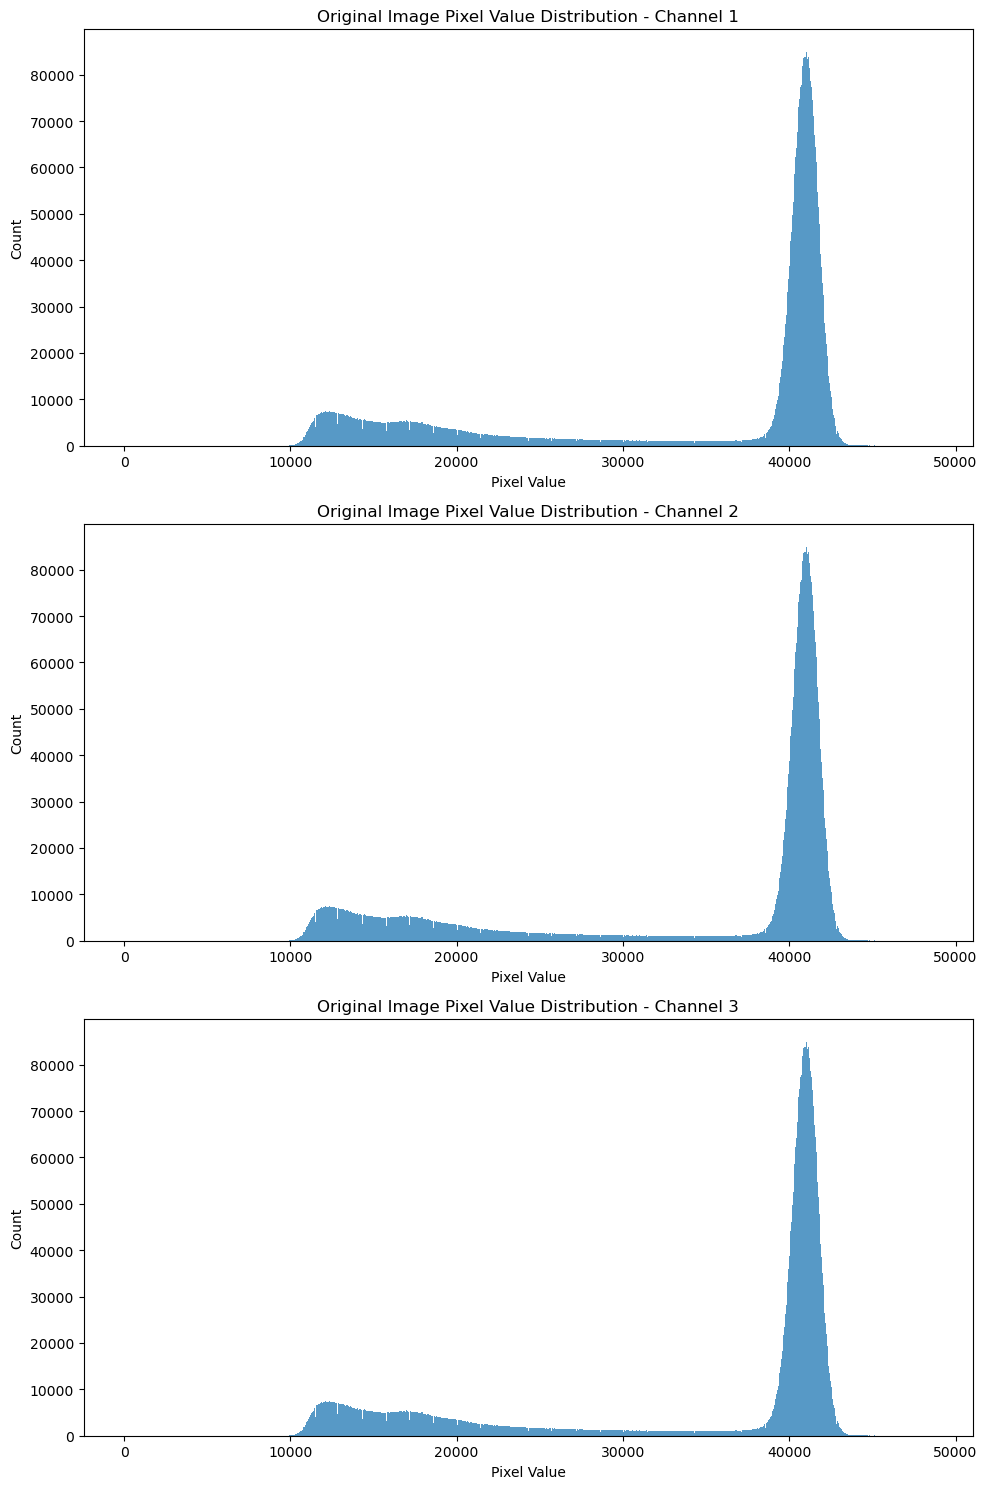

In [15]:
# Function to plot pixel value distribution by channel
def plot_pixel_value_distribution_by_channel(image_tiff, title, axs, bins=1024):
    for channel in range(image_tiff.shape[0]):
        pixel_values = image_tiff[channel].flatten()  # Flatten to 1D
        axs[channel].hist(pixel_values, bins=bins, range=(0, np.max(pixel_values)), alpha=0.75)
        axs[channel].set_title(f"{title} - Channel {channel+1}")
        axs[channel].set_xlabel('Pixel Value')
        axs[channel].set_ylabel('Count')

# Set up the subplots (3 channels = 3 plots)
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Plot original image pixel value distribution for each channel
plot_pixel_value_distribution_by_channel(image_tiff, 'Original Image Pixel Value Distribution', axs, bins=1024)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [16]:
# Ensure the image has 3 layers (channels)
if image_tiff.shape[0] != 3:
    raise ValueError(f"Image {img_path} does not have exactly 3 layers.")

# Normalize the 16-bit image to [0, 1]
#image = image.astype(np.float32)/65535.0

# Correctly extract the height and width from the shape
no_of_channel = image_tiff.shape[0]
height, width = image_tiff.shape[1], image_tiff.shape[2]
print(image_tiff.shape)
print(f"Height: {height}, Width: {width}")
print(f"no of channels:{no_of_channel}")

(3, 2054, 2456)
Height: 2054, Width: 2456
no of channels:3


# Convert to a torch tensor
image = torch.tensor(image, dtype=torch.float32)
print()
transform = v2.Compose([
    v2.crop([v2.crop,new_y:new_y + size, new_x:new_x + size] ),
])

image_croped = transform(original_image_tensor)

#save cheyth stroiyunnathan presnam enkil border value mathram saviya ennit tiff loadakkumbo transformil kodkka.

In [17]:

# Ensure that new_x, new_y, size are within bounds
new_x = max(0, new_x)
new_y = max(0, new_y)
new_size = min(size, width - new_x, height - new_y)
print(new_x)
print(new_y)
print(new_size)

326
210
1844


In [18]:
new_size > 0

True

In [19]:
image_tiff.shape

(3, 2054, 2456)

In [20]:
image_tiff.shape[1]

2054

In [21]:
new_y + new_size <= image_tiff.shape[1]

True

In [22]:
new_x + new_size <= image_tiff.shape[2]

True

In [23]:
# Ensure the crop size and coordinates are valid
if size > 0 and new_y + new_size <= image_tiff.shape[1] and new_x + new_size <= image_tiff.shape[2]:
    # Crop the image based on the calculated square dimensions
    cropped_image = image_tiff[:, new_y:new_y + new_size, new_x:new_x + new_size]  # Including all channels
    # Multiply by 65535 to restore the original 16-bit scale

    #cropped_image_16bit = (cropped_image * 65535.0).astype(np.uint16)

    # Save the cropped image as a TIFF file
    output_path = r'C:\Users\k54739\cropp_image.tiff'
    tiff.imwrite(output_path, cropped_image)

    print(f"Cropped image saved as {output_path}")
else:
    print("Invalid crop size or coordinates. The cropping box is out of bounds.")


Cropped image saved as C:\Users\k54739\cropp_image.tiff


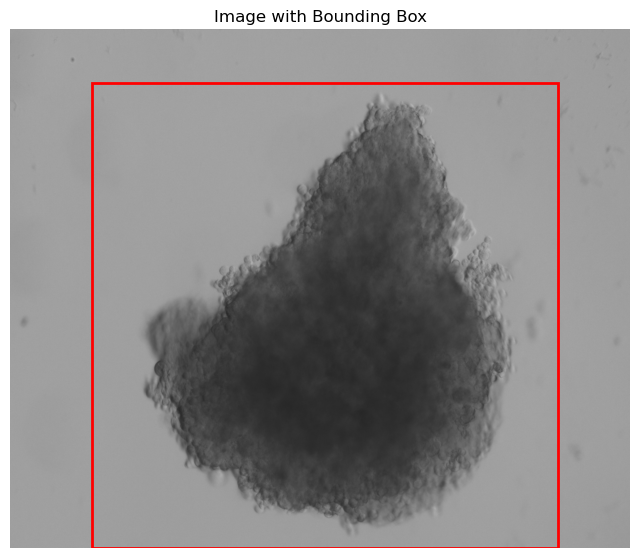

In [22]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Transpose the image to (H, W, C) format if it's in (C, H, W)
if image.shape[0] == 3:  # Assuming 3 channels
    image = image.transpose(1, 2, 0)

# Normalize the image to the range [0, 1] for floats
image = image.astype(np.float32) / 65535.0

# Display the image with the bounding box
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(image, cmap='gray')  # Assuming the image is grayscale; remove cmap for RGB

# Add a rectangle to the plot
rect = patches.Rectangle(
    (new_x, new_y),  # Bottom-left corner of the rectangle
    new_size,        # Width of the rectangle
    new_size,        # Height of the rectangle
    linewidth=2,     # Thickness of the rectangle edges
    edgecolor='red', # Color of the rectangle edges
    facecolor='none' # Transparent fill
)
ax.add_patch(rect)

# Add title and show
plt.title("Image with Bounding Box")
plt.axis("off")
plt.show()


In [24]:
crop_image = tiff.imread(output_path)

NameError: name 'output_path' is not defined

In [21]:
# Get the data type (e.g., uint8, uint16, etc.)
data_type = crop_image.dtype

# Get the image height and width
height, width = crop_image.shape[1], crop_image.shape[2]

# Get the range of pixel values
pixel_min = np.min(crop_image)
pixel_max = np.max(crop_image)

# Print the results
print(f"Data Type: {data_type}")
print(f"Height: {height}")
print(f"Width: {width}")
print(f"Range: {pixel_min} - {pixel_max}")
print(crop_image.shape)

Data Type: uint16
Height: 1783
Width: 1783
Range: 6993 - 39417
(3, 1783, 1783)


In [22]:
# Load the 3-channel grayscale image
crop_image = tiff.imread(output_path)

# Count unique pixels per channel
unique_per_channel = count_unique_per_channel(crop_image)

# Print the result
print("Unique pixel counts per channel:")
for i, count in enumerate(unique_per_channel):
    print(f"Channel {i+1}: {count}")

Unique pixel counts per channel:
Channel 1: 1928
Channel 2: 1938
Channel 3: 1949


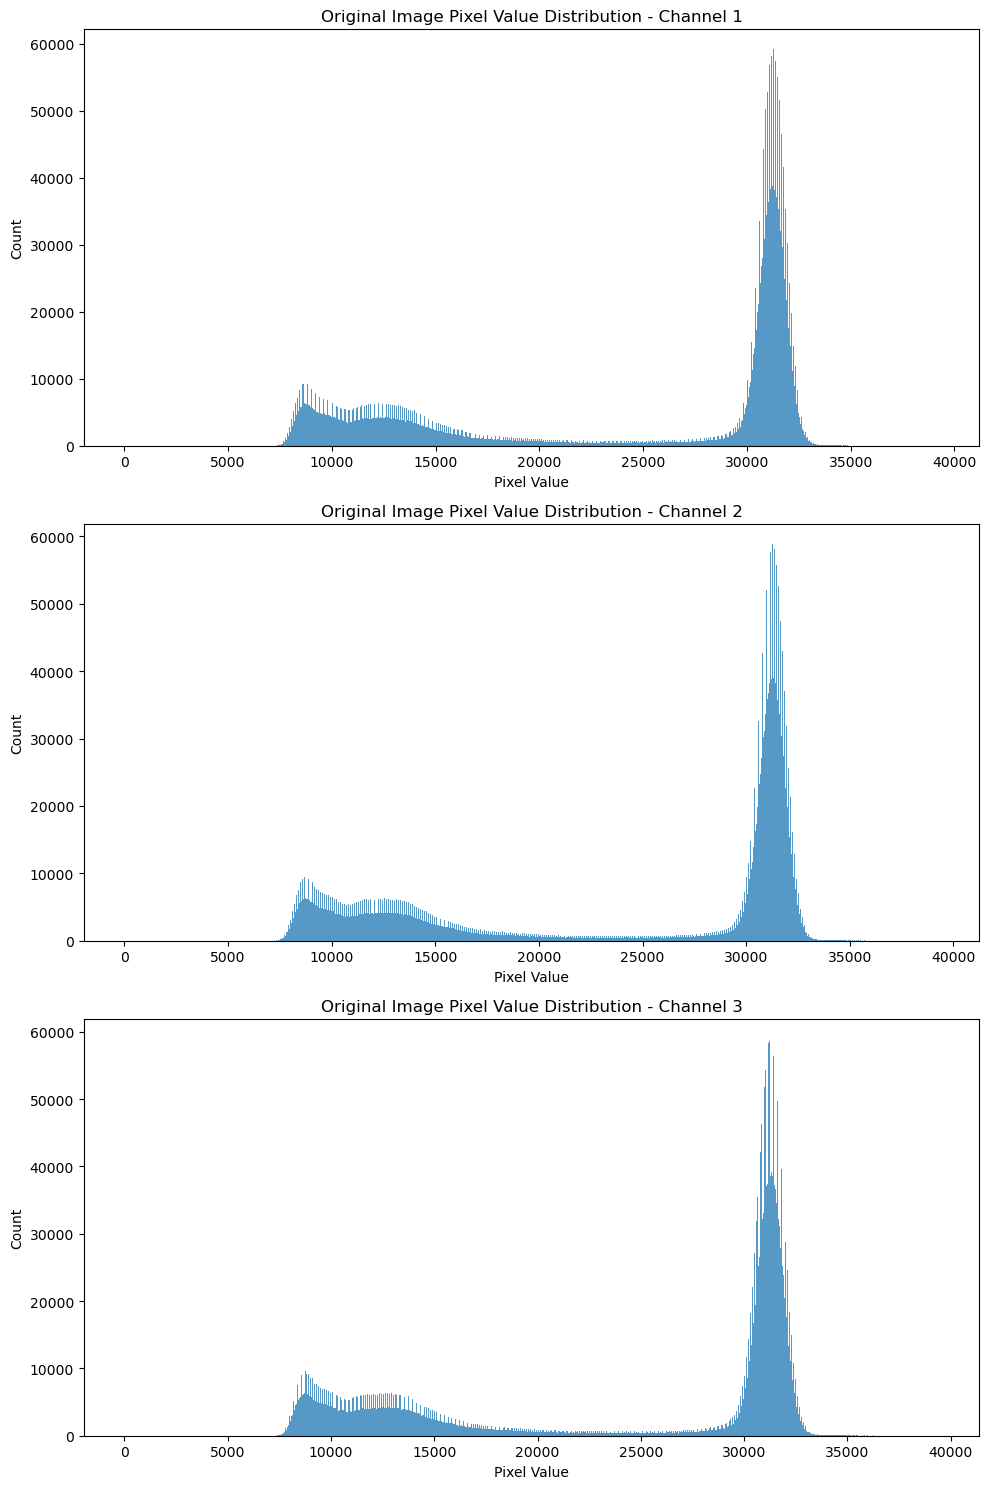

In [23]:



# Load the 3-channel grayscale image
crop_image = tiff.imread(output_path)

# Set up the subplots (3 channels = 3 plots)
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Plot original image pixel value distribution for each channel
plot_pixel_value_distribution_by_channel(crop_image, 'Original Image Pixel Value Distribution', axs, bins=1024)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()
